## Objectif du Projet

L'objectif principal : Booster les ventes de l'entreprise Amazing Basic à moindre coût et en surfant sur la vague de l’IA.

### Cadrage du besoin de l'entreprise:
- Amazing aimerait connaître ses clients
- Adapter son offre et ses prix ou personnaliser l’expérience d’achat
- Amazing amerait rester à la pointe de l'innovation et booster ses ventes en ligne.

Pour résoudre ce problème, nous tablerons notre problématique sur la question suivante:
##### De par la connaissance client, quel est le modèle stratégique IA adapté pour augmenter les ventes de produits de divertissement Amazing Basic à moindre coût afin de fidéliser la clientèle ?

## Méthodologie

1. **Traitement des Données :** Nettoyage, gestion des anomalies, et préparation des données pour l'analyse.
2. **Analyse Exploratoire des données :** Analyse descriptive et visuelle pour comprendre les données à notre disposition.
3. **Modélisation :** Application de techniques de machine learning,
4. **Interprétation :** Évaluation des modèles et analyse des résultats pour dégager des insights et des recommandations

# Import Libraries
l'importation des librairies vont nous permettre de une exploration de notre dataset et de faire une analyse descriptive efficace.

In [ ]:
# Installer gdown pour permettre le téléchargement depuis Google Drive
!pip install gdown

# Définir l'identifiant du fichier Google Drive
file_id = '1TW5MxPuuuMHhJOO7adxC9Aj3JV7aZGZW'

# Construire l'URL de téléchargement pour gdown
gdown_url = f'https://drive.google.com/uc?id={file_id}'

# Nom de sortie pour le fichier téléchargé
output_file = 'ebooks.csv'

# Télécharger le fichier depuis Google Drive et le sauvegarder sous 'ebooks.csv'
!gdown {gdown_url} -O {output_file}

Downloading...
From: https://drive.google.com/uc?id=1TW5MxPuuuMHhJOO7adxC9Aj3JV7aZGZW
To: C:\Users\bmade\ebooks.csv

  0%|          | 0.00/73.3M [00:00<?, ?B/s]
  4%|4         | 3.15M/73.3M [00:00<00:02, 27.4MB/s]
  9%|9         | 6.82M/73.3M [00:00<00:02, 28.4MB/s]
 14%|#3        | 9.96M/73.3M [00:00<00:02, 21.5MB/s]
 19%|#9        | 14.2M/73.3M [00:00<00:02, 24.8MB/s]
 24%|##4       | 17.8M/73.3M [00:00<00:02, 25.4MB/s]
 30%|###       | 22.0M/73.3M [00:00<00:01, 28.6MB/s]
 34%|###4      | 25.2M/73.3M [00:00<00:01, 27.2MB/s]
 40%|####      | 29.4M/73.3M [00:01<00:01, 30.5MB/s]
 46%|####6     | 34.1M/73.3M [00:01<00:01, 28.4MB/s]
 54%|#####4    | 39.8M/73.3M [00:01<00:00, 35.0MB/s]
 60%|######    | 44.0M/73.3M [00:01<00:01, 28.7MB/s]
 66%|######5   | 48.2M/73.3M [00:01<00:00, 31.3MB/s]
 71%|#######   | 51.9M/73.3M [00:01<00:00, 26.5MB/s]
 77%|#######7  | 56.6M/73.3M [00:01<00:00, 30.7MB/s]
 82%|########2 | 60.3M/73.3M [00:02<00:00, 30.0MB/s]
 89%|########8 | 65.0M/73.3M [00:02<00:00, 3

### Lecture des données

* Commencons par l'importation des packages nécessaires

In [ ]:
# importation des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# téléchargement de la dataset depuis le drive
df = pd.read_csv(output_file)

# Suppression de la colonne 'origin_file'
df.drop(columns=['origin_file'], inplace=True)

display(df.head(5))

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 02:20:47 UTC,view,5200007,2053013553316626707,computers.ebooks,pocketbook,99.68,553879242,081ff3cf-2f3c-40ab-a96e-8224875c2e78
1,2019-10-01 02:41:40 UTC,view,5200131,2053013553316626707,computers.ebooks,pocketbook,128.45,512840416,f77aa50f-1f31-4543-8aff-e7aeca10d426
2,2019-10-01 02:41:53 UTC,view,5200131,2053013553316626707,computers.ebooks,pocketbook,128.45,512840416,f77aa50f-1f31-4543-8aff-e7aeca10d426
3,2019-10-01 02:42:03 UTC,view,5200131,2053013553316626707,computers.ebooks,pocketbook,128.45,512840416,f77aa50f-1f31-4543-8aff-e7aeca10d426
4,2019-10-01 02:51:48 UTC,view,5200090,2053013553316626707,computers.ebooks,amazon,257.38,540004194,3dbd81be-d970-491a-85c6-00d641dd6ba1


In [ ]:
#Changement d'index
# df=df.set_index('product_id')
# df = df.set_index('product_id')
# df

## Exploration globale des données de la DataFrame "df"

cela consiste à afficher une vue globale de toutes les informations qui caractérisent notre Dataframe après avoir fusionner nos différentes dataset et choisi de travailler sur le produit "computers.ebooks".

##### 1. Inspection de la base de données

In [ ]:
# Affichage les informations basiques du DataFrame
print("\nInformations sur notre DataFrame:")
df.info()

# Affichage de la dimension du DataFrame
print("\nDimension de la DataFrame:")
print(df.shape)

# Affichage des valeurs du DataFrame
print("\nValeurs manquantes par colonne:")
print(df.isnull().sum())
print(df.isnull().mean()*100)

# Affichage des valeurs unique du DataFrame
print("\nNombre de valeurs uniques par colonne:")
print(df.nunique())


Informations sur notre DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480136 entries, 0 to 480135
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     480136 non-null  object 
 1   event_type     480136 non-null  object 
 2   product_id     480136 non-null  int64  
 3   category_id    480136 non-null  int64  
 4   category_code  480136 non-null  object 
 5   brand          466950 non-null  object 
 6   price          480136 non-null  float64
 7   user_id        480136 non-null  int64  
 8   user_session   480136 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 33.0+ MB

Dimension de la DataFrame:
(480136, 9)

Valeurs manquantes par colonne:
event_time           0
event_type           0
product_id           0
category_id          0
category_code        0
brand            13186
price                0
user_id              0
user_session         0
dtype: int64
even

Nous constatons que notre DataFrame consistue 480136 observations contre plus de 30 millions d'observations au préalable et 10 champs.
Notre dataset actuelle comporte:
- 1 champ de type Float
- 3 champs de type integer
- 6 champs de type object
- Dans la colonne "brand" compte 13186 valeurs manquantes

In [ ]:
# Description des variables qualitatives
df.describe(include="object")

,event_time,event_type,category_code,brand,user_session
count,480136,480136,480136,466950,480136
unique,468564,3,1,67,201563
top,2020-02-02 18:08:56 UTC,view,computers.ebooks,pocketbook,41f7ade8-dc14-4ed7-85a8-9bb96a347099
freq,22,459607,480136,187393,190


#### 2. Changement des types de format des champs

In [ ]:
# Conversion de 'event_time' en datetime

# Supprimer le fuseau horaire et convertir en datetime
df['event_time'] = pd.to_datetime(df['event_time']).dt.tz_localize(None)

# Extraire uniquement la date (sans l'heure)
df['event_time'] = df['event_time'].dt.date

# Conversion des autres colonnes vers des types appropriés (string)
df['event_type'] = df['event_type'].astype("string")
df['product_id'] = df['product_id'].astype("string")
df['category_id'] = df['category_id'].astype("string")
df['category_code'] = df['category_code'].astype("string")
df['brand'] = df['brand'].astype("string")
df['user_id'] = df['user_id'].astype("string")
df['user_session'] = df['user_session'].astype("string")


print("\n DataFrame après formatage des champs")
df.info()

# Affichage de quelques lignes de notre Dataset
print("\n Les 5 premières lignes de notre dataset:")
display(df.head())


 DataFrame après formatage des champs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480136 entries, 0 to 480135
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     480136 non-null  object 
 1   event_type     480136 non-null  string 
 2   product_id     480136 non-null  string 
 3   category_id    480136 non-null  string 
 4   category_code  480136 non-null  string 
 5   brand          466950 non-null  string 
 6   price          480136 non-null  float64
 7   user_id        480136 non-null  string 
 8   user_session   480136 non-null  string 
dtypes: float64(1), object(1), string(7)
memory usage: 33.0+ MB

 Les 5 premières lignes de notre dataset:


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01,view,5200007,2053013553316626707,computers.ebooks,pocketbook,99.68,553879242,081ff3cf-2f3c-40ab-a96e-8224875c2e78
1,2019-10-01,view,5200131,2053013553316626707,computers.ebooks,pocketbook,128.45,512840416,f77aa50f-1f31-4543-8aff-e7aeca10d426
2,2019-10-01,view,5200131,2053013553316626707,computers.ebooks,pocketbook,128.45,512840416,f77aa50f-1f31-4543-8aff-e7aeca10d426
3,2019-10-01,view,5200131,2053013553316626707,computers.ebooks,pocketbook,128.45,512840416,f77aa50f-1f31-4543-8aff-e7aeca10d426
4,2019-10-01,view,5200090,2053013553316626707,computers.ebooks,amazon,257.38,540004194,3dbd81be-d970-491a-85c6-00d641dd6ba1


In [ ]:
# desciption de la base de données

df.describe(include = "all")
# Affichage de statistique descriptive:
# df.describe()                     ### affiche uniquement les variable quantitative
# df.describe(include = "object")  ### affiche uniquement les variable qualitative


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,480136,480136,480136,480136,480136,466950,480136.000000,480136,480136
unique,213,3,1344,4,1,67,NaN,141130,201563
top,2019-11-16,view,5200131,2053013553316626707,computers.ebooks,pocketbook,NaN,619573377,41f7ade8-dc14-4ed7-85a8-9bb96a347099
freq,5269,459607,29461,272442,480136,187393,NaN,285,190
mean,NaN,NaN,NaN,NaN,NaN,NaN,122.286344,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,101.472598,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,34.750000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,102.940000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,162.090000,NaN,NaN


### Constat et détection des anomalies
- **event_time :** Il y a 480 136 événements enregistrer. L'horodatage le plus fréquent est le 2020-02-02 18:08:56 UTC, qui apparaît 22 fois.
- **event_type :** Trois types d'événements sont présents, avec view comme événement le plus fréquent avec 459 607 occurrences.
- **product_id :** Valeurs de type numérique ce qui n'est pas normale.
- **category_id :** Valeurs de type numérique ce qui n'est pas normale.
- **category_code :** Une seule catégorie nommée "computers.ebooks" pour tous les produits.
- **brand :** Compte 466 950 occurences avec 67 marques distinctes connues. La marque la plus fréquente est "pocketbook", présente 187,393 fois.
- **price :** Le prix moyen est de 122.29 avec des variations. Le prix le plus bas est 0 et le plus élevé est 2,018.18. on observe donc une anomalie au niveau de certains prix qui sont à zéro.
- **user_id :** Valeur de type numérique ce qui n'est pas normale.
- **user_session :** 480 136 sessions avec 201 563 identifiants de session uniques. La session la plus fréquente apparaît 190 fois.
- **origin_file :** 7 fichiers sources différents. Le fichier le plus fréquent est 2019-Dec.csv.gz, contenant 105,991 lignes de données.

### Détection des anomalies constatées

Au vue des statistiques observées dans notre DataFrame nous avons constaté un certain nombre d'anomalies:

- **Colonnes price avec des valeurs à zéro :** Le prix minimum est de 0, ce qui peut indiquer des produits gratuits ou des erreurs dans la collecte des données. Ces valeurs doivent être examinées pour comprendre si un prix de zéro est valide ou si cela représente des données manquantes ou erronées.

- **Valeurs manquantes dans brand :** Il y a 466,950 valeurs dans la colonne brand pour 480,136 entrées, ce qui signifie que certaines lignes n'ont pas d’information de marque (environ 13,186 valeurs manquantes). Ces valeurs manquantes pourraient être imputées ou analysées pour comprendre pourquoi elles sont absentes.

- **Une grande fréquence dans la colonne event_type  de la valeur "view" :** event_type montre une très grande fréquence de l'événement view (459,607 occurrences), ce qui représente presque toutes les lignes. Cela pourrait indiquer un déséquilibre dans les types d’événements enregistrés, avec un manque relatif d’autres types d’événements (cart, purchase). Cet écart peut biaiser les analyses comportementales.

Ces constats nous amènent à énumérer les anomalies suivants:
- Anomalie au niveau des format des variables (event_time, event_type, product_id, category_id, category_code, brand, user_id, user_session, origin_file).
- Les valeurs manquantes pour la colonne "brand" et valeurs aberrantes pour la colonne "price" ou le prix minimal est de 0.
- Vérifier et éliminer les doublons éventuels.
- Déséquilibres de données representative au niveau de la colonne "event_type" sur l'apparition dominante de l'occurence "view".

##### 2. Identification et nettoyage des valeurs manquantes et des valeurs aberrantes

- **Identification graphique des valeurs manquantes**

In [ ]:
!pip install missingno

import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer

import seaborn as sns

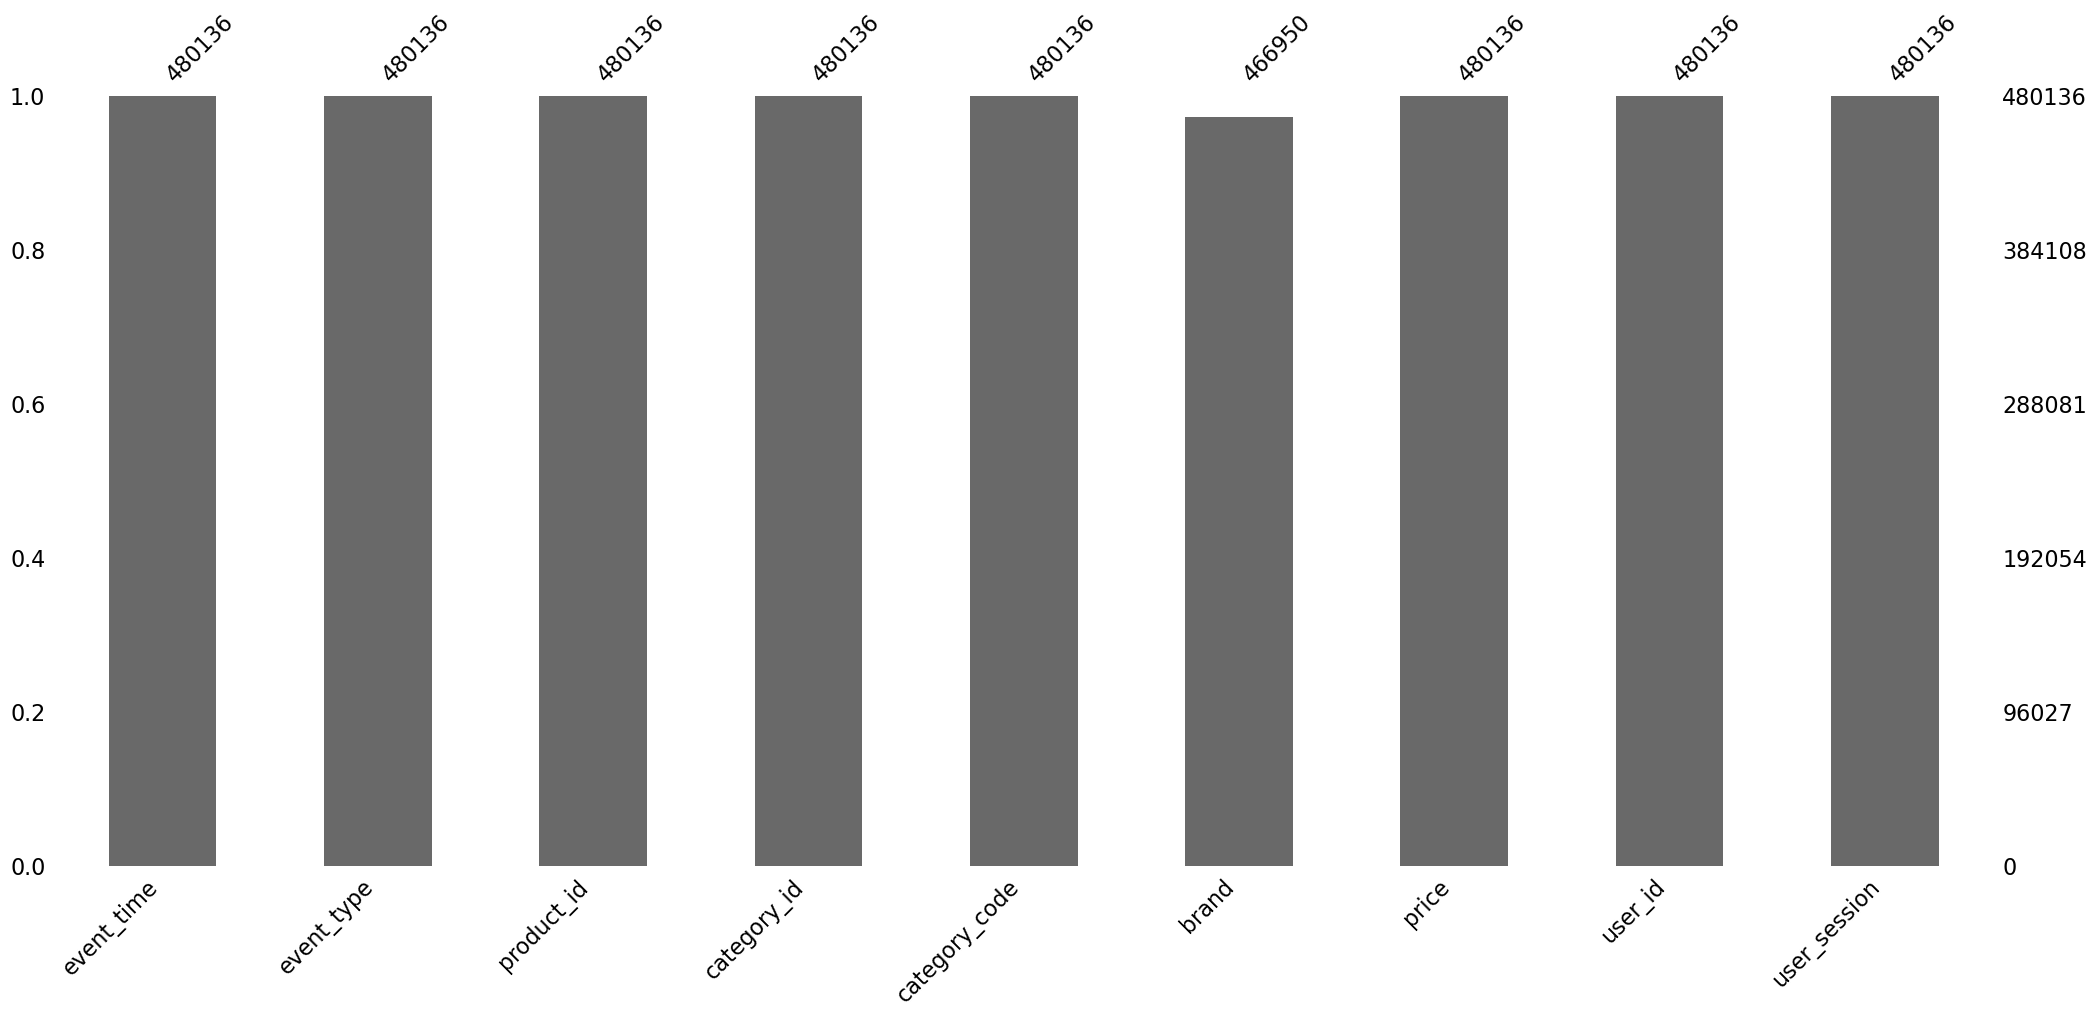

In [ ]:
msno.bar(df)
plt.show()

Nous remarquons que presque toutes les colonnes sont complètes avec très peu de valeur manquante, on observe que la colonne brand, semble avoir un léger déficit en données par rapport aux autres. Ce qui confirme notre analyse plus haut faite sur la détection des valeurs manquantes et des valeurs aberrantes.

- **Traitement des valeurs manquantes :** Nous allons traiter nos valeurs manquantes à partir de **l'Imputation par une catégorie générique**.

Nous allons remplir les valeurs manquantes avec une étiquette générique comme **"inconnu"** car nous souhaitons garder nos enregistrements tout en marquant une distinction de ces valeurs manquantes car nous avons à faire à une variable qualitative.

In [ ]:
# Remplacement des valeurs manquantes dans 'brand' par "inconnu"
df['brand'].fillna('inconnu', inplace=True)

# Vérifier les valeurs manquantes après traitement
missing_values = df.isnull().sum()
print("\nValeurs manquantes après traitement:\n", missing_values)


Valeurs manquantes après traitement:
 event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64


C:\Users\bmade\anaconda3\Lib\site-packages\scipy\cluster\hierarchy.py:2847: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


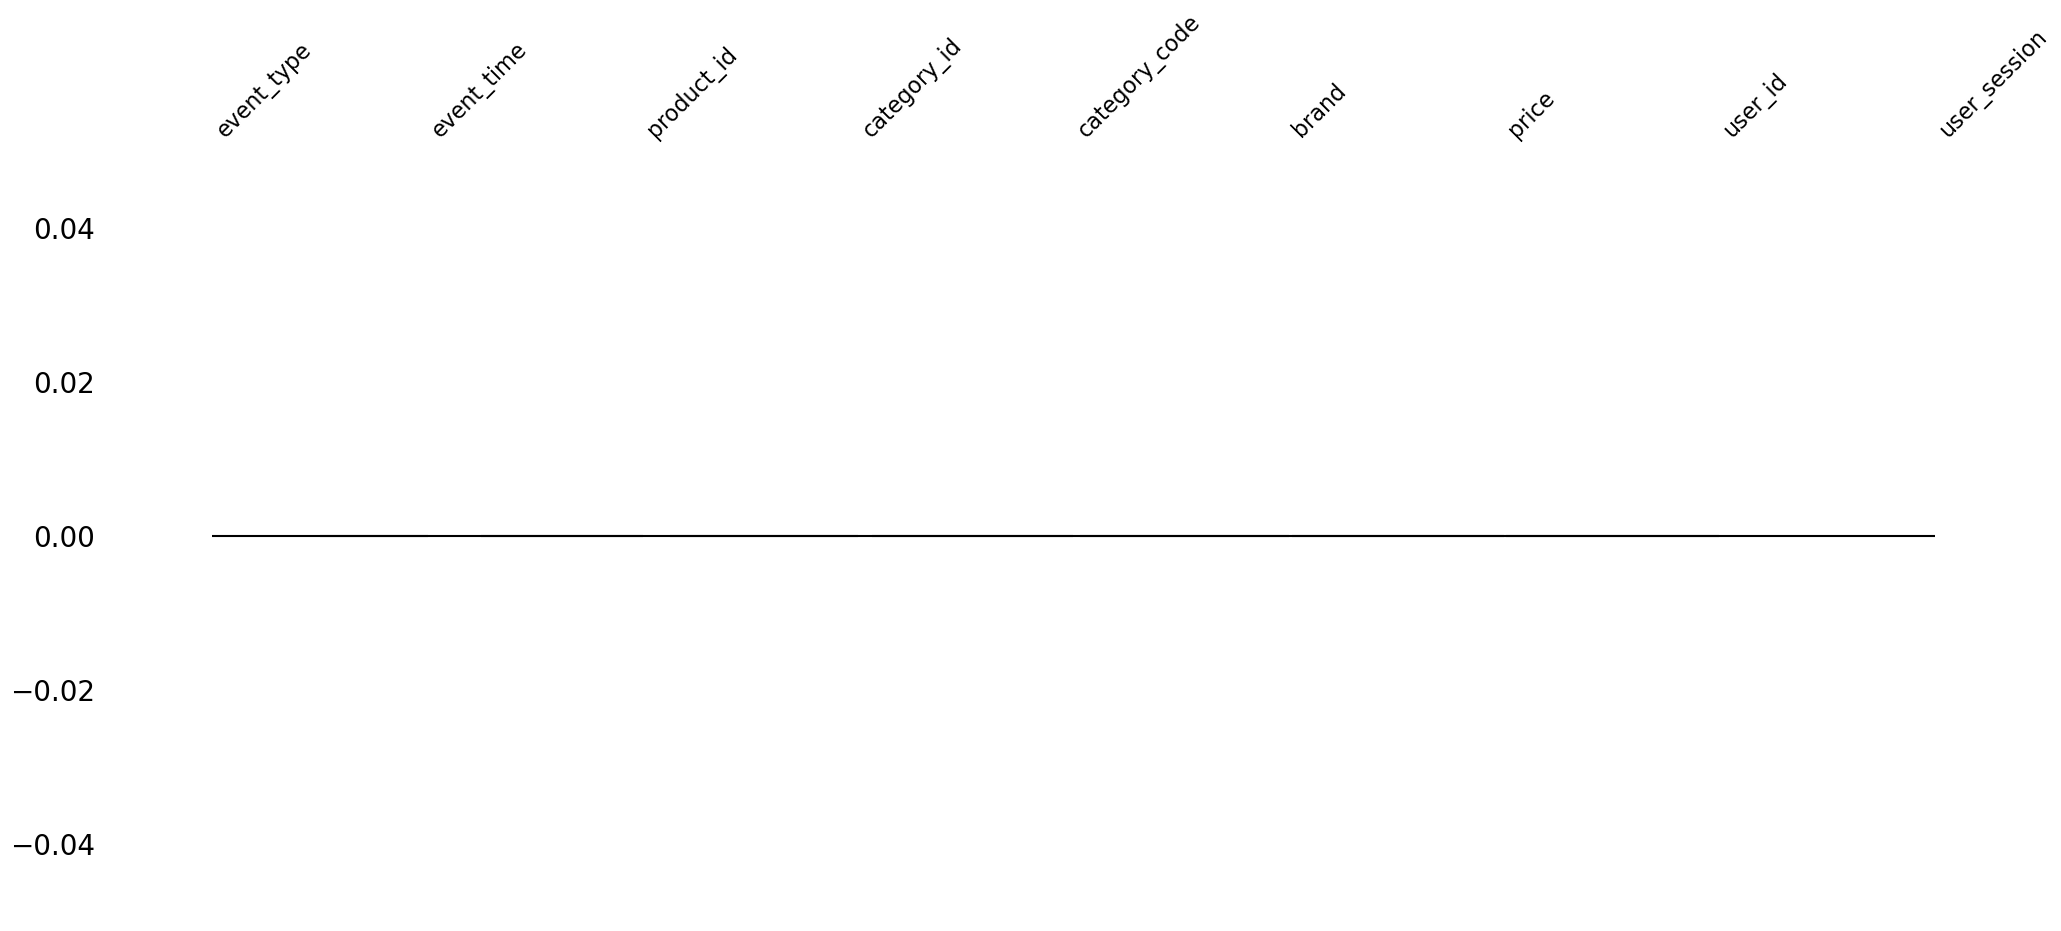

In [ ]:
# Analyse de la corrélation entre les valeurs manquantes
msno.dendrogram(df)
plt.show()

- **Identification graphique des outliers ou des valeurs aberrantes**

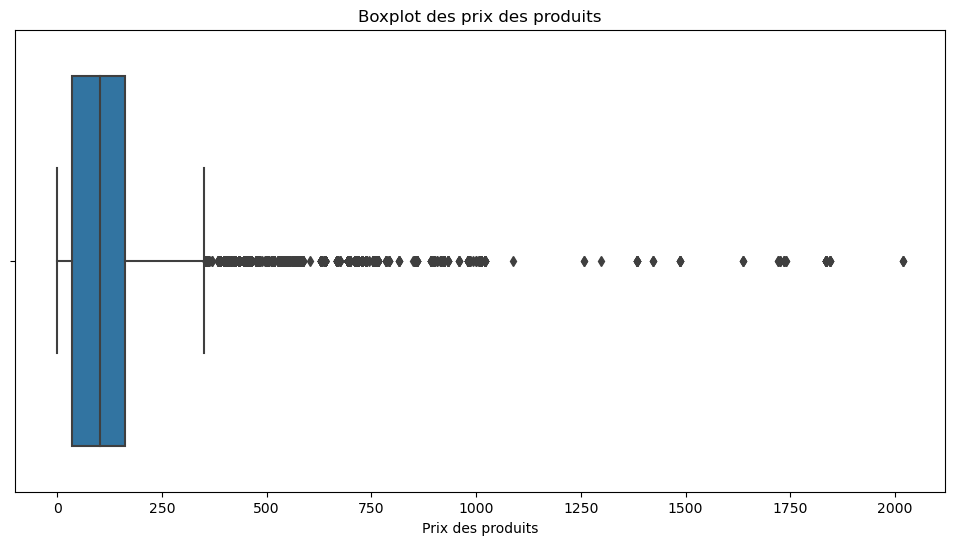

In [ ]:
# Visualisation des outliers en utilisant un boxplot(boite à moustache) avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='price')
plt.xlabel('Prix des produits')
plt.title("Boxplot des prix des produits")
plt.show()

- Nous observons que la ligne à l'intérieur de la boîte montre la médiane (ou le prix central) des produits. Dans ce cas, la majorité des prix est concentrée dans une plage assez étroite, située entre 0 et environ 250. **C'est à dire que 50% des produits ont un prix inférieur à 120 et 50% des produits ont un prix supérieur à 120.**
- Nous ne remarquons aussi aucun points à gauche qui representent les valeurs aberrantes c'est à dire qu'il n'y a aucune valeurs aberrante à gauche.
- les points isolés (à droite) : représentent les outliers (ou valeurs extrêmes), qui sont des prix beaucoup plus élevés que la majorité. Ici, **plusieurs prix dépassent largement 250 et vont jusqu'à 2000**. Ces prix sont considérés comme atypiques, car ils sont significativement plus élevés que la plupart des autres.

En conclusion nous pouvons dire que, la majorité des prix des produits est relativement basse (autour de 0 à 250), mais il existe quelques produits beaucoup plus chers qui créent des valeurs extrêmes dans la distribution des prix.

#### Identification des outliers univariées : avec la méthode IQR (Interquartile range)

In [ ]:
# Identification des données aberrantes - IQR
# Fonction pour détecter les outliers en utilisant l'IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Trouver les outliers pour la colonne 'price'
outliers = detect_outliers_iqr(df, 'price')

# Afficher les outliers
print("Outliers détectés:")
print(outliers)
print(len(outliers))

Outliers détectés:
        event_time event_type product_id          category_id  \
6       2019-10-01       view    5200111  2053013553316626707   
7       2019-10-01       view    5200111  2053013553316626707   
55      2019-10-01       view    5200111  2053013553316626707   
186     2019-10-01       view    5200111  2053013553316626707   
189     2019-10-01       view    5200111  2053013553316626707   
...            ...        ...        ...                  ...   
479659  2020-04-30       view    5200111  2232732103210959441   
479676  2020-04-30       view    5200094  2232732103210959441   
479677  2020-04-30       view    5200094  2232732103210959441   
479679  2020-04-30       view    5200094  2232732103210959441   
479813  2020-04-30       view    5200094  2232732103210959441   

           category_code   brand   price    user_id  \
6       computers.ebooks  amazon  408.98  531342768   
7       computers.ebooks  amazon  408.98  531342768   
55      computers.ebooks  amazon  4

##### 3. Exploration Data Analysis (EDA)

#### Analyses descriptives Univariées

Elle consiste à voir comment se présente notre base de données après traitement des valeurs manquantes et des valeurs aberrantes.

L'idée ici est de de voir à quoi ressemble le prix moyen de notre base de données et comment sont les autres prix par rapport à ce prix moyen. Dans ce cas nous allons faire ressortir tous les éléments essentiels qui le caractérise.

In [ ]:
# Analyse desciptive du jeu de données
df.describe()

,price
count,480136.000000
mean,122.286344
std,101.472598
min,0.000000
25%,34.750000
50%,102.940000
75%,162.090000
max,2018.180000


In [ ]:
# Description des variables qualitatives
df.describe(include="all")

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,480136,480136,480136,480136,480136,480136,480136.000000,480136,480136
unique,213,3,1344,4,1,68,NaN,141130,201563
top,2019-11-16,view,5200131,2053013553316626707,computers.ebooks,pocketbook,NaN,619573377,41f7ade8-dc14-4ed7-85a8-9bb96a347099
freq,5269,459607,29461,272442,480136,187393,NaN,285,190
mean,NaN,NaN,NaN,NaN,NaN,NaN,122.286344,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,101.472598,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,34.750000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,102.940000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,162.090000,NaN,NaN


<Axes: >

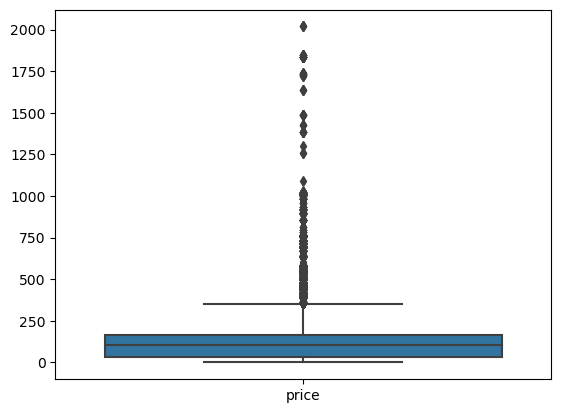

In [ ]:
# Analyse descriptive des variables quantitatives
sns.boxplot(data=df)

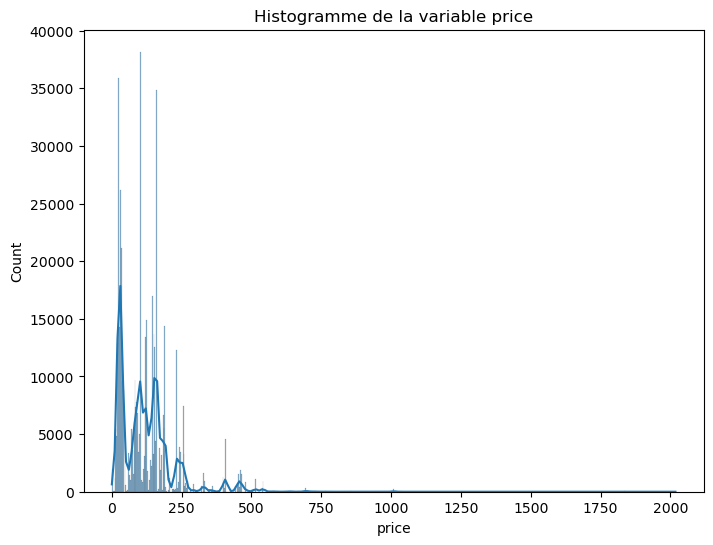

La variable price ne suit pas une loi normale (p-value=0.0)


In [ ]:
# Analyse de la normalité

from scipy import stats

# Filtrer les colonnes numériques uniquement
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Création d'un histogramme et d'un test de normalité pour chaque variable numérique
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(df[column].dropna())  # Ignorer les valeurs manquantes
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")


### Caractéristiques à calculer pour vérifier la normalité et la présence des valeurs aberrantes

In [ ]:
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm

# Sélectionner la variable d'intérêt (longueur des sépales)
price = df['price']

# Calcul du skewness et du kurtosis
skewness = stats.skew(price)
kurtosis = stats.kurtosis(price,fisher=False)#Vrai kurtosis
excess_kurtosis = stats.kurtosis(price)#Vrai kurtosis
print(f"Skewness: {skewness}")
print(f"Kurtosis réel: {kurtosis}")
print(f"Excès de kurtosis: {excess_kurtosis}")

Skewness: 2.4665775963991012
Kurtosis réel: 18.042150914950398
Excès de kurtosis: 15.042150914950398


**Skewness (Asymétrie) = 2.47** :

La skewness mesure l'asymétrie de la distribution des données.
Une skewness positive (supérieure à 0) signifie que la distribution est asymétrique vers la droite, avec une queue plus longue du côté des valeurs élevées.
Ici, la skewness est 2.47, ce qui est assez élevé, indiquant que la distribution des prix est fortement inclinée vers la droite.


**Kurtosis réel = 18.04** :

La kurtosis mesure la "hauteur" des pics de la distribution par rapport à une distribution normale.
Une kurtosis élevée (supérieure à 3) indique que la distribution a des pics plus élevés et des queues plus lourdes que la normale, ce qui signifie que les valeurs extrêmes (outliers) sont plus fréquentes.
Ici, la kurtosis est 18.04, ce qui est très élevé, indiquant une distribution très pointue avec des outliers nombreux.


**Excès de kurtosis = 15.04** :

L'excès de kurtosis est simplement la différence entre la kurtosis observée et la kurtosis d'une distribution normale (qui est 3).
Un excès de kurtosis élevé signifie également une distribution plus pointue et avec plus de valeurs extrêmes que la normale.
Ici, l'excès de kurtosis est 15.04, ce qui renforce l'idée d'une distribution fortement concentrée autour de la moyenne, avec des valeurs extrêmes (outliers) très présentes.

**Conclusion** :
Les résultats montrent que la variable price suit une distribution asymétrique et très pointue, avec de nombreux outliers. Cela suggère que les prix dans votre ensemble de données ne suivent pas une distribution normale.

**Ces paramètres confirment la présence des valeurs aberrantes et la non distribution des prix.**

#### Test de significativité pour la normalité

In [ ]:
# Niveau de signification (alpha)
alpha = 0.05

# Effectuer les tests de normalité
shapiro_test = stats.shapiro(price)
ks_test = stats.kstest(price, 'norm')
ad_test = stats.anderson(price, dist='norm')
dagostino_test = stats.normaltest(price)
lilliefors_test = lilliefors(price, dist='norm')

# Créer un tableau pandas avec les résultats des tests
test_results = pd.DataFrame({
    'Nom du test': ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Anderson-Darling', "D'Agostino-Pearson", 'Lilliefors'],
    'Statistique de test': [shapiro_test[0], ks_test.statistic, ad_test.statistic, dagostino_test.statistic, lilliefors_test[0]],
    'p-valeur': [shapiro_test[1], ks_test.pvalue, None, dagostino_test.pvalue, lilliefors_test[1]],
    'Normalité': ['Oui' if shapiro_test[1] > alpha else 'Non',
                  'Oui' if ks_test.pvalue > alpha else 'Non',
                  'Oui' if any(ad_test.statistic < crit_val for crit_val in ad_test.critical_values) else 'Non',
                  'Oui' if dagostino_test.pvalue > alpha else 'Non',
                  'Oui' if lilliefors_test[1] > alpha else 'Non']
})

print(test_results)

C:\Users\bmade\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


          Nom du test  Statistique de test  p-valeur Normalité
0        Shapiro-Wilk             0.809007     0.000       Non
1  Kolmogorov-Smirnov             0.995839     0.000       Non
2    Anderson-Darling         16751.271217       NaN       Non
3  D'Agostino-Pearson        280468.929139     0.000       Non
4          Lilliefors             0.146595     0.001       Non


Conclusion: Ces tests de normalité nous confirment que la variable **price** n'est pas effectivement normalement distribués donc elle ne suit pas une loi normale.

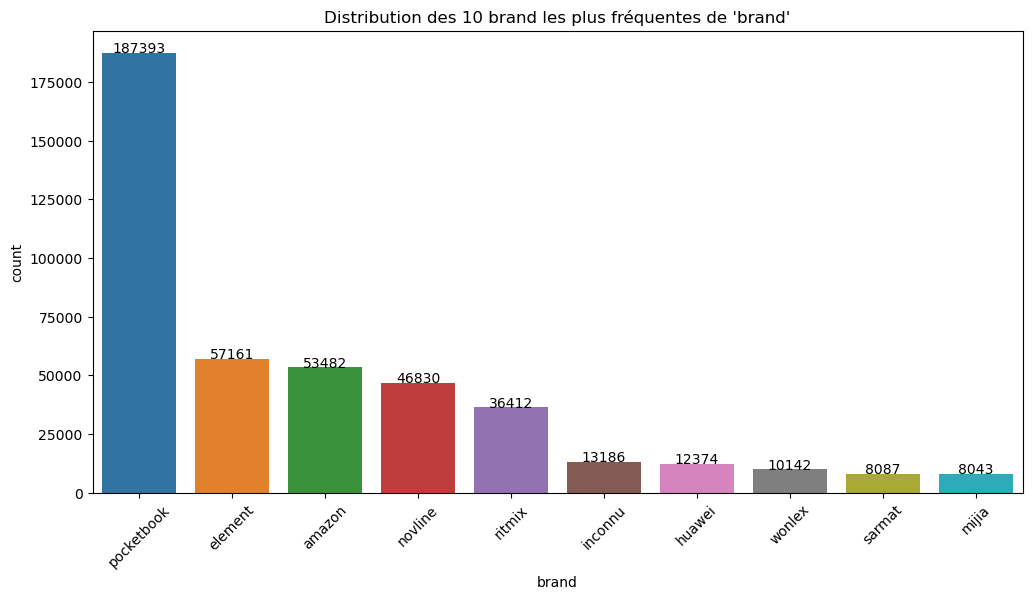

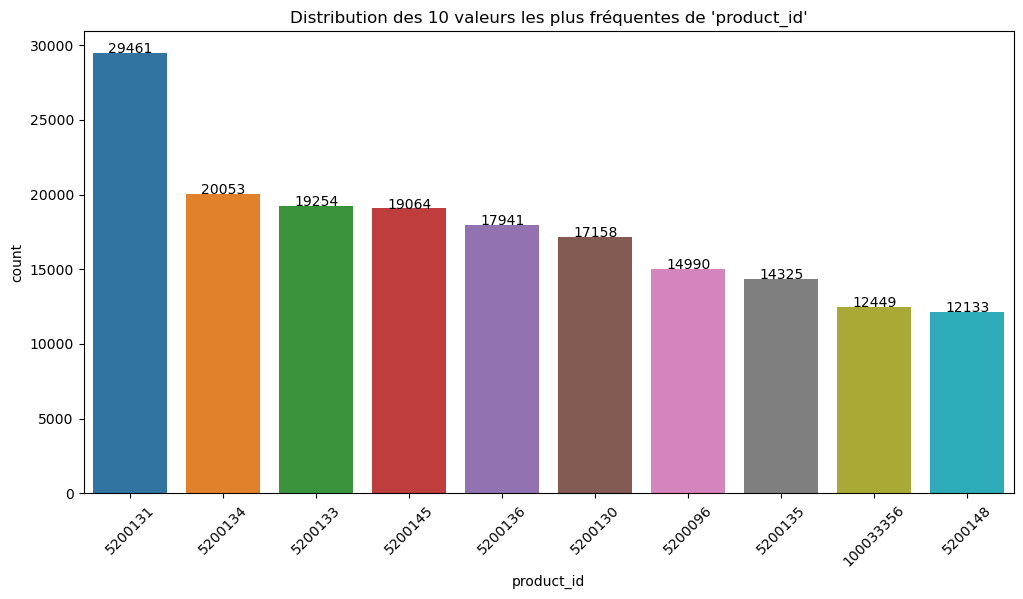

In [ ]:
# Analyse des variables qualitatives

# # Analyse de la variable qualitative 'event_type' avec annotations
# plt.figure(figsize=(8, 6))
# ax = sns.countplot(x='event_type', data=df)
# plt.title("Distribution de la variable 'event_type'")

# # Ajouter les valeurs au-dessus de chaque barre
# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height())}',
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='baseline')


# Analyse de la variable qualitative 'brand' (10 plus fréquents uniquement) avec annotations
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='brand', data=df, order=df['brand'].value_counts().index[:10])
plt.title("Distribution des 10 brand les plus fréquentes de 'brand'")
plt.xticks(rotation=45)

# Ajouter les valeurs au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')


# Analyse de la variable qualitative 'product_id' (10 plus fréquents uniquement) avec annotations
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='product_id', data=df, order=df['product_id'].value_counts().index[:10])
plt.title("Distribution des 10 valeurs les plus fréquentes de 'product_id'")
plt.xticks(rotation=45)

# Ajouter les valeurs au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')



plt.show()

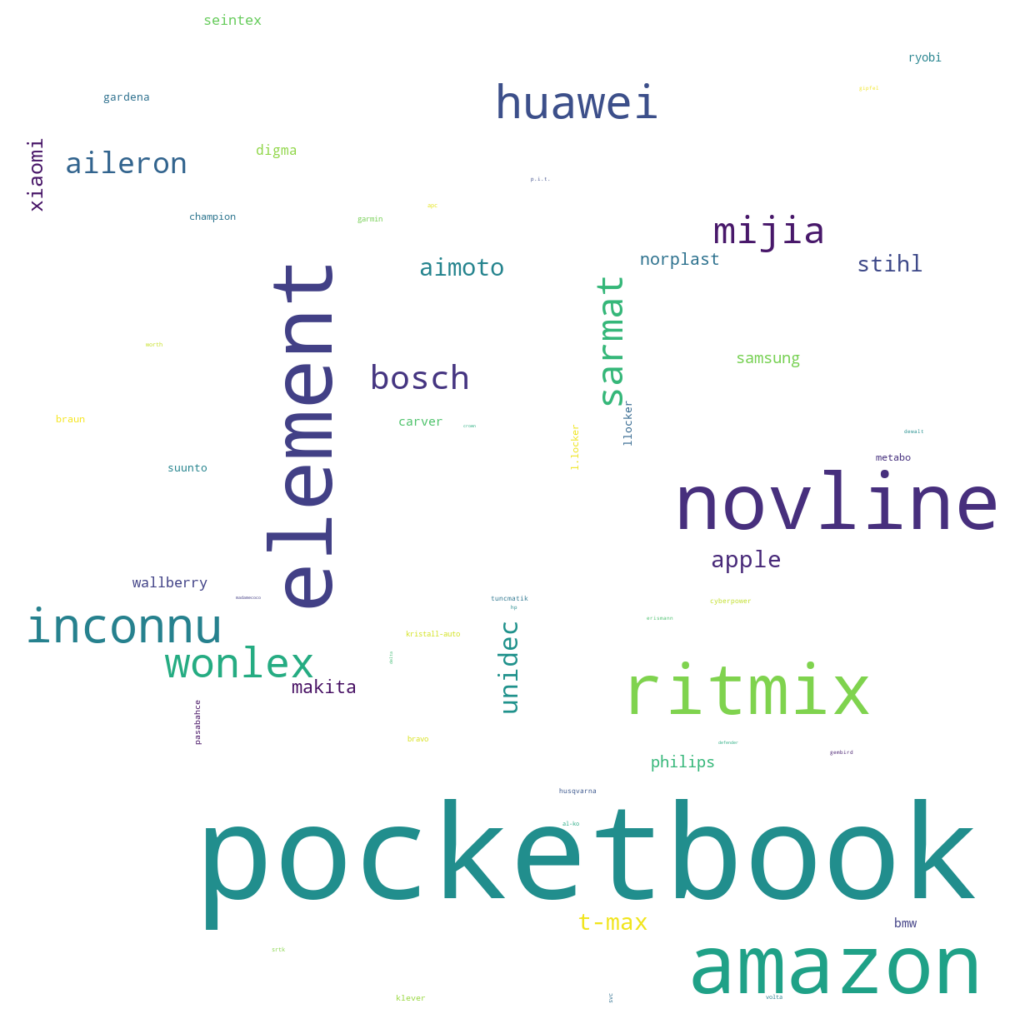

In [ ]:
## Analyse descriptive univariée de brand
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calculer la fréquence de chaque marque
brand_counts = df['brand'].value_counts()

# Générer le word cloud en passant la fréquence de 'brand', avec des paramètres ajustés
wordcloud = WordCloud(
    width=1200,                # Augmenter la largeur
    height=1200,               # Augmenter la hauteur
    background_color='white',
    min_font_size=5,           # Réduire la taille minimale de la police
    max_words=100              # Augmenter le nombre de mots affichés (peut être ajusté selon le besoin)
).generate_from_frequencies(brand_counts)

# Afficher le word cloud
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

event_type
view        0.957243
cart        0.033388
purchase    0.009368
Name: count, dtype: Float64


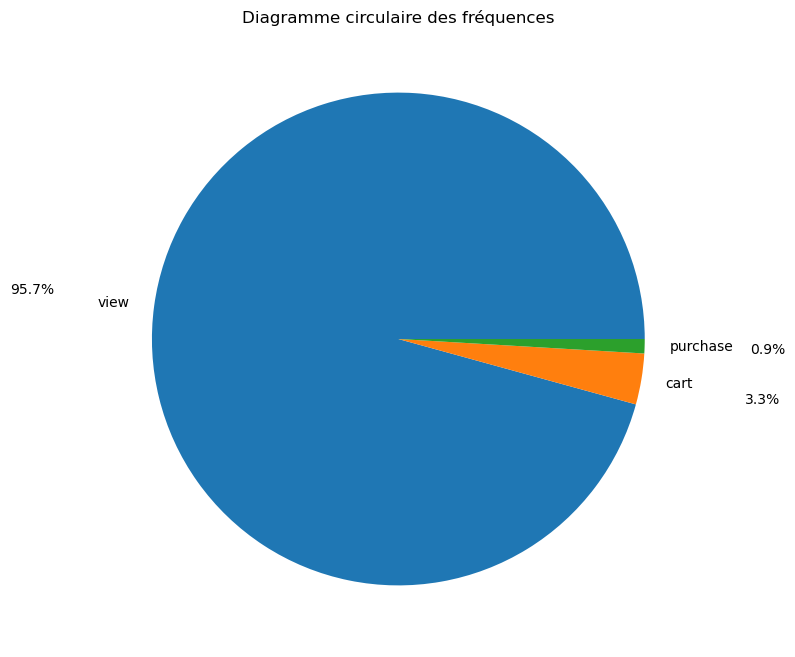

In [ ]:
# # Analyse de la variable qualitative 'event_type'

# Création d'un tableau de fréquences pour la variable "event_type"
freq_table = (df['event_type'].value_counts())/len(df)
print(freq_table)

#Création d'un diagramme circulaire pour le tableua de fréquence

plt.figure(figsize=(8, 8))
plt.pie(freq_table, labels=freq_table.index, autopct='%1.1f%%', pctdistance=1.5)
plt.title("Diagramme circulaire des fréquences")
plt.show()

# Analyses descriptives Bivariées

L'objectif dans cette analyse est de comprendre les liaisons qui existent entre les variables en fonction de la nature de chacun des types.

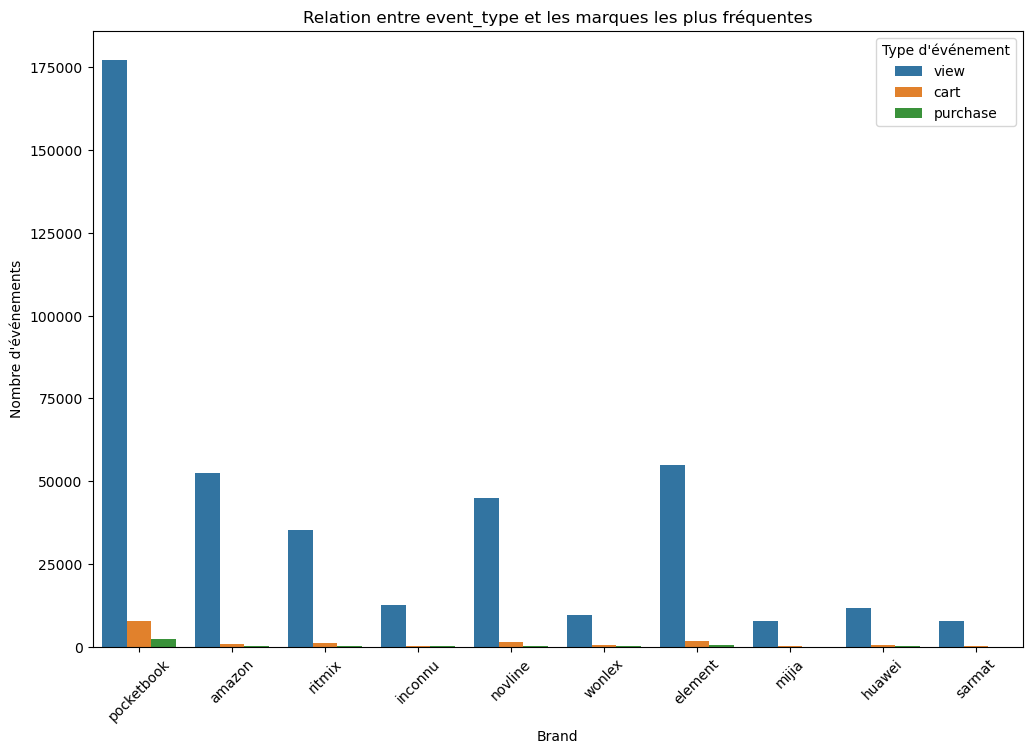

In [ ]:
# Analyse graphique Quali x Quali (event_type et brand)

# Filtrer pour afficher les 10 marques les plus fréquentes
top_brands = df['brand'].value_counts().index[:10]
df_top_brands = df[df['brand'].isin(top_brands)]

# Créer un graphique de la relation entre 'event_type' et 'brand'
plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_brands, x='brand', hue='event_type')
plt.xlabel('Brand')
plt.ylabel('Nombre d\'événements')
plt.title('Relation entre event_type et les marques les plus fréquentes')
plt.xticks(rotation=45)
plt.legend(title='Type d\'événement')
plt.show()


#### Test de significativité des liaisons

**Test du chi-carré (chi2)**

**Hypothèses:**

H0 (hypothèse nulle): Il n'y a pas d'association entre les deux variables qualitatives.
H1 (hypothèse alternative): Il y a une association entre les deux variables qualitatives.

**Interprétation:**

Si la p-valeur est inférieure au seuil de significativité (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'il y a une association entre les deux variables qualitatives.

In [ ]:
# Calcul de chi deux sur la df
from scipy.stats import chi2_contingency
# Créer un tableau de contingence
contingency_table = pd.crosstab(df['brand'], df['event_type'])
contingency_table

event_type,cart,purchase,view
brand,,,
aileron,54,10,4776
aimoto,98,12,3170
al-ko,0,0,81
amazon,787,241,52454
apc,0,0,70
...,...,...,...
volta,2,0,113
wallberry,7,1,1006
wonlex,441,124,9577


In [ ]:
# Effectuer le test du chi-carré
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

# Afficher les résultats
print("Statistique du chi-carré :", chi2_stat)
print("P-valeur :", p_value)
print("Degrés de liberté :", dof)
print("Fréquences attendues :\n", expected_freq)
if p_value < 0.05:
        print(f"Il y a une association ou dépendance entre les deux variables qualitatives (p-value={p_value})")
else:
        print(f"Il n'y pas une association ou dépendance entre les deux variables qualitatives (p-value={p_value})")

Statistique du chi-carré : 2366.141222391721
P-valeur : 0.0
Degrés de liberté : 134
Fréquences attendues :
 [[1.61600130e+02 4.53419864e+01 4.63305788e+03]
 [1.09514138e+02 3.07276272e+01 3.13975824e+03]
 [2.70446498e+00 7.58822500e-01 7.75367125e+01]
 [1.78568144e+03 5.01028950e+02 5.11952896e+04]
 [2.33719196e+00 6.55772531e-01 6.70070355e+01]
 [1.66942283e-01 4.68408951e-02 4.78621682e+00]
 [1.02135289e+02 2.86572596e+01 2.92820745e+03]
 [2.71782037e+01 7.62569772e+00 7.79196099e+02]
 [2.12684469e+02 5.96753003e+01 6.09764023e+03]
 [1.51917478e+01 4.26252145e+00 4.35545731e+02]
 [6.64430286e+00 1.86426762e+00 1.90491430e+02]
 [2.83467997e+01 7.95358398e+00 8.12699616e+02]
 [1.35557134e+01 3.80348068e+00 3.88640806e+02]
 [6.67769132e-01 1.87363580e-01 1.91448673e+01]
 [5.64264917e+00 1.58322225e+00 1.61774129e+02]
 [4.67438392e-01 1.31154506e-01 1.34014071e+01]
 [6.67769132e-01 1.87363580e-01 1.91448673e+01]
 [6.67769132e-01 1.87363580e-01 1.91448673e+01]
 [1.16859598e+00 3.27886266e

**Confirmation de la dépendance des deux variables en calculant le** ***Coefficient de Cramér-V***

**Interprétation:**
    
Plus la valeur de Cramér-V est proche de 1 (supérieur à 0.60), plus l'association entre les deux variables est forte.

In [ ]:
# Calculer le coefficient de Cramér-V
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Afficher le coefficient de Cramér-V
print("Coefficient de Cramér-V :", cramer_v)
if cramer_v < 0.6:
        print(f"Faible association ou dépendance entre les deux variables qualitatives (cramer_v = {cramer_v})")
else:
        print(f"Forte association ou dépendance entre les deux variables qualitatives (cramer_v = {cramer_v})")

Coefficient de Cramér-V : 0.04963901990880846
Faible association ou dépendance entre les deux variables qualitatives (cramer_v = 0.04963901990880846)


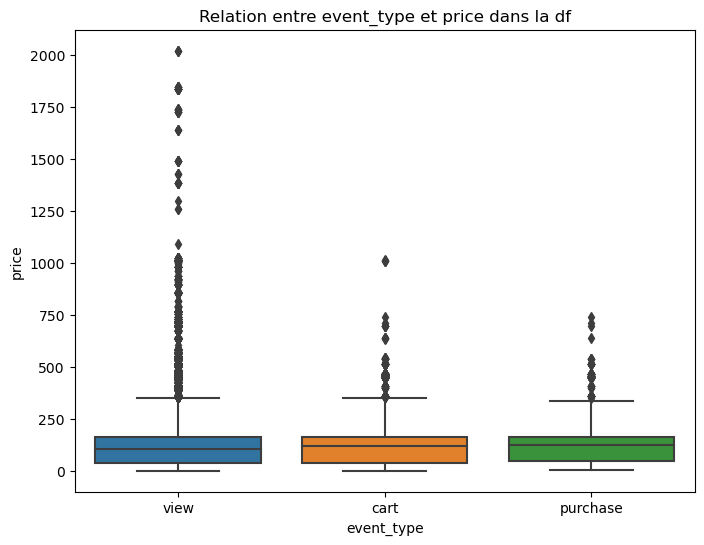

In [ ]:
# Analyse Quali x Quanti (event_type et price)

# Créer un boxplot de la relation entre 'event_type' et 'price' dans la df
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='event_type', y='price')
plt.xlabel('event_type')
plt.ylabel('price')
plt.title('Relation entre event_type et price dans la df')
plt.show()

Pour mieux comprendre la liaison entre une variable qualitative et une variable quantitative.
Nous allons utiliser les tests de Student (t-test), ANOVA, Mann-Whitney, Kruskal-Walli.

Dans cas, on ne peut pas utiliser les tests de Student (t-test) ni ANOVA car la variable "price" n'est pas normalement distribuée (voir le test de normalité plus haut).

D'ou nous allons utiliser les tests de Mann-Whitney, Kruskal-Walli pour vérifier cette dépendance.

## Test de Kruskal-Wallis

Hypothèses

H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.

H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

Conditions d'utilisation
Les observations sont indépendantes.
Les données peuvent être ordonnées (au moins ordinale).

In [ ]:
from scipy import stats

# Appliquer le test de Kruskal-Wallis pour la variable 'price' en fonction des catégories de 'brand'
column = 'price'  # Variable numérique (prix)
groups = [df[column][df['event_type'] == brand] for brand in df['event_type'].unique()]

# Effectuer le test de Kruskal-Wallis
kruskal_stat, p_value = stats.kruskal(*groups)

# Afficher les résultats
if p_value < 0.05:
    print(f"La variable {column} est significativement différente entre les groupes de event_type (p-value={p_value})")
else:
    print(f"La variable {column} n'est pas significativement différente entre les groupes de event_type (p-value={p_value})")


La variable price est significativement différente entre les groupes de event_type (p-value=3.880032673809121e-24)


**Conclusion:**  Etant donné que la p-valeur obtenue est très inférieure à 0.05, cela indique qu'il existe une dépendance statistique entre les variables price et event_type. Autrement dit, le type d'événement (event_type) a un impact significatif sur les prix (price), ce qui signifie que les prix varient en fonction des différents types d'événements.

C:\Users\bmade\AppData\Local\Temp\ipykernel_19496\3929751221.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='brand', y='price', data=df, palette='viridis')


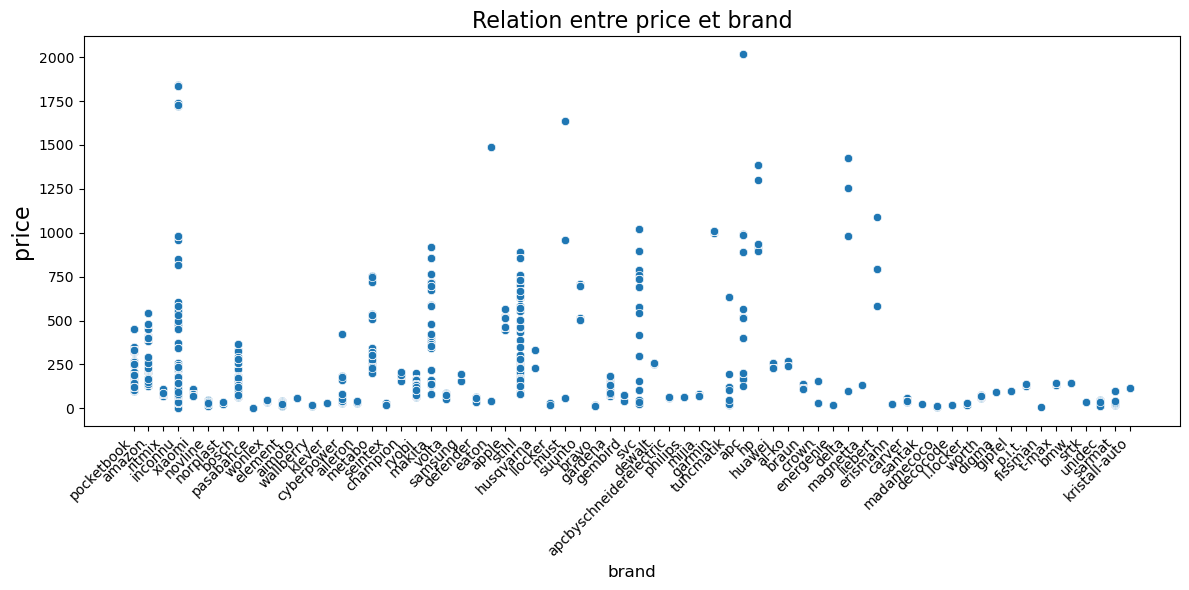

In [ ]:
# Analyse Quali x Quanti (brand et price)

# Nuage de points pour 'price' vs 'brand'
plt.figure(figsize=(12, 6))  # Ajuste la taille du graphique
sns.scatterplot(x='brand', y='price', data=df, palette='viridis')

# Rendre le graphique plus lisible
plt.title("Relation entre price et brand", fontsize=16)
plt.xlabel('brand', fontsize=12)  # Augmenter la taille des labels de l'axe x
plt.ylabel('price', fontsize=16)  # Ajuster la taille des labels de l'axe y

# Rotation des labels de l'axe x pour plus de lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster la taille du graphique
plt.tight_layout()

# Afficher le graphique
plt.show()


## Test de Kruskal-Wallis

Hypothèses

H0 (hypothèse nulle): Les distributions de tous les groupes sont égales.
H1 (hypothèse alternative): Au moins une des distributions des groupes est différente des autres.

Conditions d'utilisation
Les observations sont indépendantes.
Les données peuvent être ordonnées (au moins ordinale).

In [ ]:
from scipy import stats

# Appliquer le test de Kruskal-Wallis pour la variable 'price' en fonction des catégories de 'brand'
column = 'price'  # Variable numérique (prix)
groups = [df[column][df['brand'] == brand] for brand in df['brand'].unique()]

# Effectuer le test de Kruskal-Wallis
kruskal_stat, p_value = stats.kruskal(*groups)

# Afficher les résultats
if p_value < 0.05:
    print(f"La variable {column} est significativement différente entre les groupes de 'brand' (p-value={p_value})")
else:
    print(f"La variable {column} n'est pas significativement différente entre les groupes de 'brand' (p-value={p_value})")


La variable price est significativement différente entre les groupes de 'brand' (p-value=0.0)


**Conclusion:** Le fait que le test de Kruskal-Wallis ait donné une p-valeur significativement inférieure à 0.05 (p-value=0.0) signifie qu'il existe une dépendance statistique entre la variable price et la variable brand. Cela implique que le prix des produits varie en fonction de la marque, ou en d'autres termes, les différentes marques ont des distributions de prix différentes.

C:\Users\bmade\AppData\Local\Temp\ipykernel_19496\101643816.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='brand', y='price', data=df, palette='viridis')


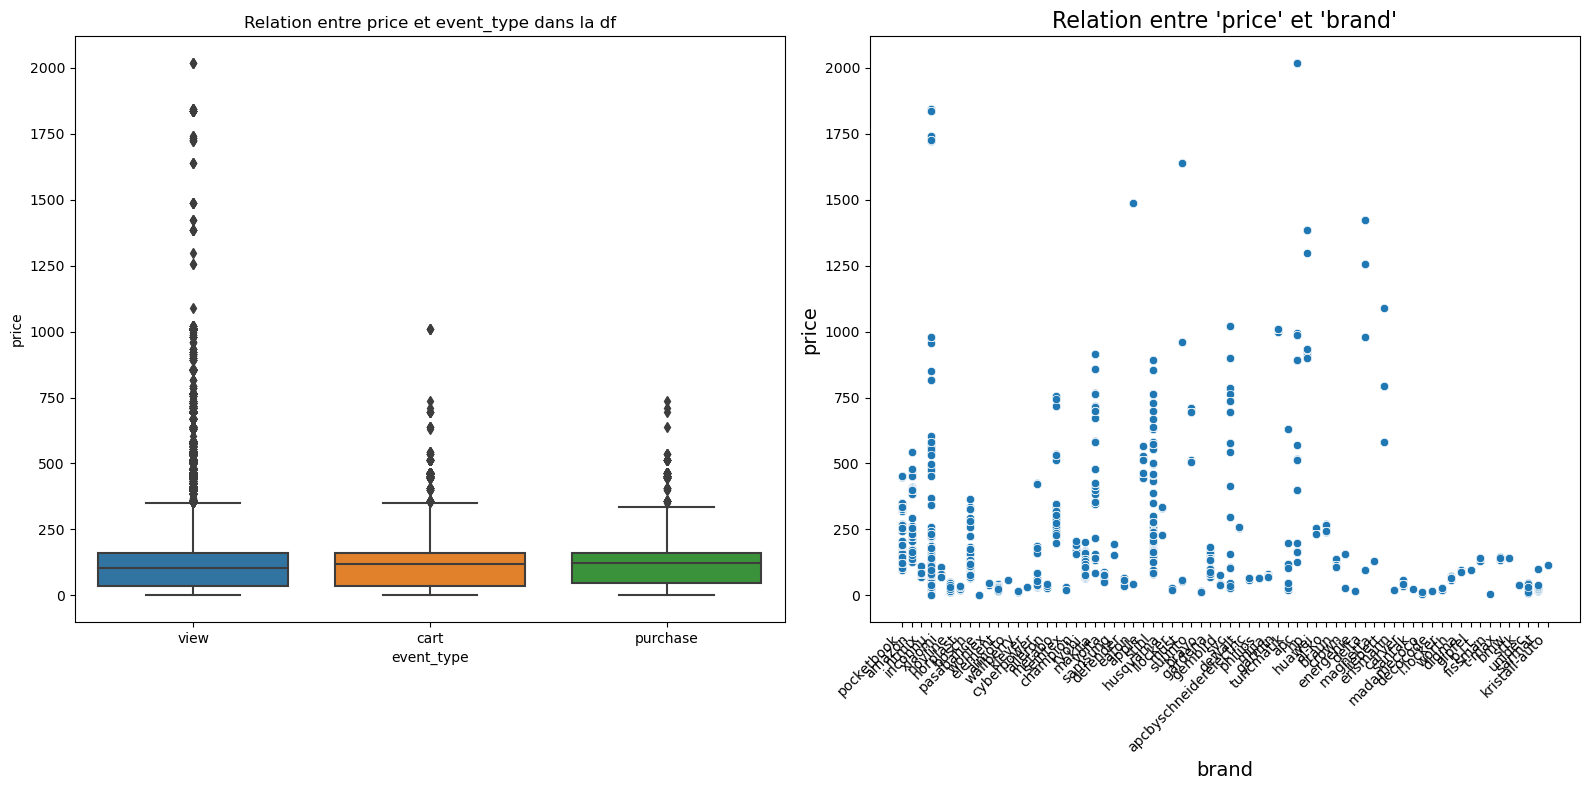

In [ ]:
# Création des nuages de points pour la variable 'price' en fonction des variables 'event_type' et 'brand'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Boxplot pour 'price' vs 'event_type'
sns.boxplot(x='event_type', y='price', data=df, ax=ax[0])
ax[0].set_title('Relation entre price et event_type dans la df')

# # Nuage de points pour 'price' vs 'brand'
# sns.scatterplot(x='brand', y='price', data=df, ax=ax[1])
# ax[1].set_title("Relation entre 'price' en fonction de 'event_type'")
# ax[1].set_xlabel('brand')
# ax[1].set_ylabel('price')
# Nuage de points pour 'price' vs 'brand'
sns.scatterplot(x='brand', y='price', data=df, palette='viridis')

# Rendre le graphique plus lisible
plt.title("Relation entre 'price' et 'brand'", fontsize=16)
plt.xlabel('brand', fontsize=14)
plt.ylabel('price', fontsize=14)

# Rotation des labels de l'axe x pour plus de lisibilité
plt.xticks(rotation=45, ha='right')

# Ajuster la taille du graphique

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Charger vos données (remplacez ce chemin par celui de votre fichier)
# df = pd.read_csv("votre_fichier.csv")

# Liste des variables qualitatives à tester
qualitative_columns = ['event_time', 'event_type', 'product_id',
                       'category_id', 'category_code', 'brand', 'user_session']  # à adapter selon vos variables qualitatives

# Initialiser des DataFrames pour stocker les résultats du test du khi-deux, p-values et V de Cramer
chi2_stat_results = pd.DataFrame(index=qualitative_columns, columns=qualitative_columns)
p_value_results = pd.DataFrame(index=qualitative_columns, columns=qualitative_columns)
cramers_v_results = pd.DataFrame(index=qualitative_columns, columns=qualitative_columns)

# Fonction pour calculer le V de Cramer
def cramers_v(chi2, n, r, c):
    return np.sqrt(chi2 / (n * min(r - 1, c - 1)))

# Boucle pour tester chaque paire de variables qualitatives
for col1 in qualitative_columns:
    for col2 in qualitative_columns:
        if col1 != col2:  # éviter les tests sur une variable avec elle-même
            # Créer le tableau de contingence
            contingency_table = pd.crosstab(df[col1], df[col2])

            # Appliquer le test du khi-deux
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

            # Calculer la taille de l'échantillon et les dimensions de la table de contingence
            n = contingency_table.sum().sum()
            r, c = contingency_table.shape

            # Calculer le V de Cramer
            v_cramer = cramers_v(chi2_stat, n, r, c)

            # Remplir les tableaux croisés avec les résultats du test du khi-deux, p-value et V de Cramer
            chi2_stat_results.at[col1, col2] = chi2_stat
            p_value_results.at[col1, col2] = p_value
            cramers_v_results.at[col1, col2] = v_cramer

# Afficher les tableaux croisés
print("Tableau croisé des statistiques du khi-deux :")
display(chi2_stat_results)

print("\nTableau croisé des p-values :")
display(p_value_results)

print("\nTableau croisé du V de Cramer :")
display(cramers_v_results)

C:\Users\bmade\AppData\Local\Temp\ipykernel_19496\1317721963.py:19: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r - 1, c - 1)))
C:\Users\bmade\AppData\Local\Temp\ipykernel_19496\1317721963.py:19: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r - 1, c - 1)))
C:\Users\bmade\AppData\Local\Temp\ipykernel_19496\1317721963.py:19: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r - 1, c - 1)))
C:\Users\bmade\AppData\Local\Temp\ipykernel_19496\1317721963.py:19: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r - 1, c - 1)))
C:\Users\bmade\AppData\Local\Temp\ipykernel_19496\1317721963.py:19: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r - 1, c - 1)))
C:\Users\bmade\AppData\Local\Temp\ipykernel_19496\1317721963.py:19: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(r 

Tableau croisé des statistiques du khi-deux :


,event_time,event_type,product_id,category_id,category_code,brand,user_session
event_time,NaN,3917.692014,1282167.812012,92959.015725,0.0,438238.986642,101221468.24014
event_type,3917.692014,NaN,7037.658223,219.342157,0.0,2366.141222,253677.665098
product_id,1282167.812012,7037.658223,NaN,1259642.423069,0.0,29228295.983872,384503051.918998
category_id,92959.015725,219.342157,1259642.423069,NaN,0.0,1088725.329669,1408092.644052
category_code,0.0,0.0,0.0,0.0,NaN,0.0,0.0
brand,438238.986642,2366.141222,29228295.983872,1088725.329669,0.0,NaN,26500470.133533
user_session,101221468.24014,253677.665098,384503051.919,1408092.644052,0.0,26500470.133533,NaN



Tableau croisé des p-values :


,event_time,event_type,product_id,category_id,category_code,brand,user_session
event_time,NaN,0.0,0.0,0.0,1.0,0.0,0.0
event_type,0.0,NaN,0.0,0.0,1.0,0.0,1.0
product_id,0.0,0.0,NaN,0.0,1.0,0.0,0.0
category_id,0.0,0.0,0.0,NaN,1.0,0.0,0.0
category_code,1.0,1.0,1.0,1.0,NaN,1.0,1.0
brand,0.0,0.0,0.0,0.0,1.0,NaN,0.0
user_session,0.0,1.0,0.0,0.0,1.0,0.0,NaN



Tableau croisé du V de Cramer :


,event_time,event_type,product_id,category_id,category_code,brand,user_session
event_time,NaN,0.063873,0.112233,0.254041,NaN,0.116717,0.997209
event_type,0.063873,NaN,0.085609,0.015113,NaN,0.049639,0.513977
product_id,0.112233,0.085609,NaN,0.935149,NaN,0.953196,0.7722
category_id,0.254041,0.015113,0.935149,NaN,NaN,0.869394,0.988719
category_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,0.116717,0.049639,0.953196,0.869394,NaN,NaN,0.907627
user_session,0.997209,0.513977,0.7722,0.988719,NaN,0.907627,NaN


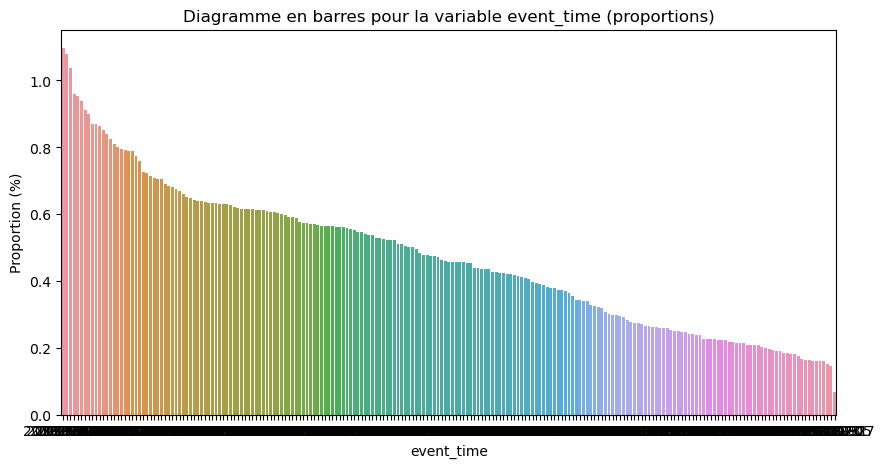

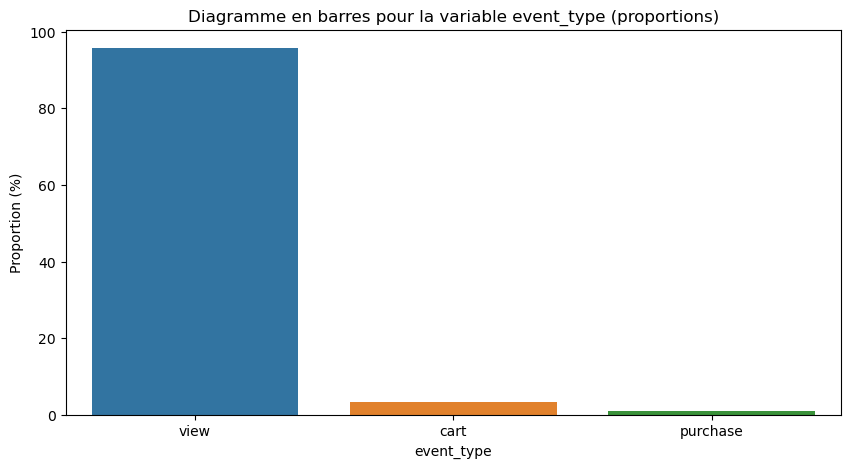

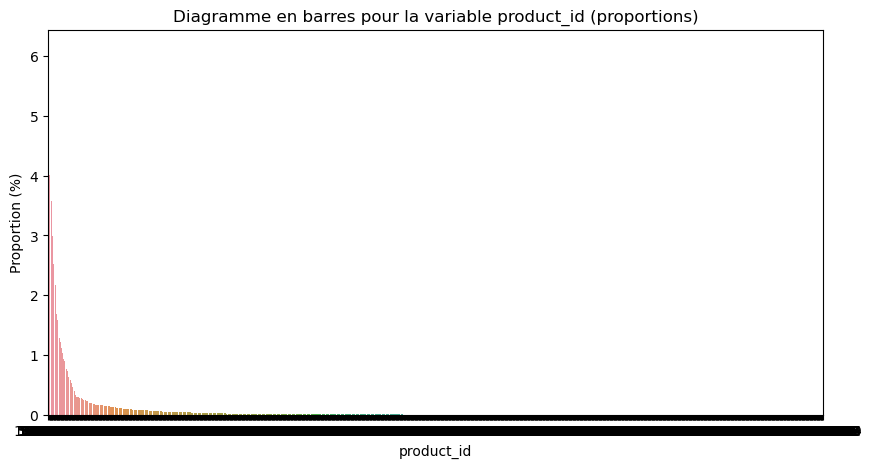

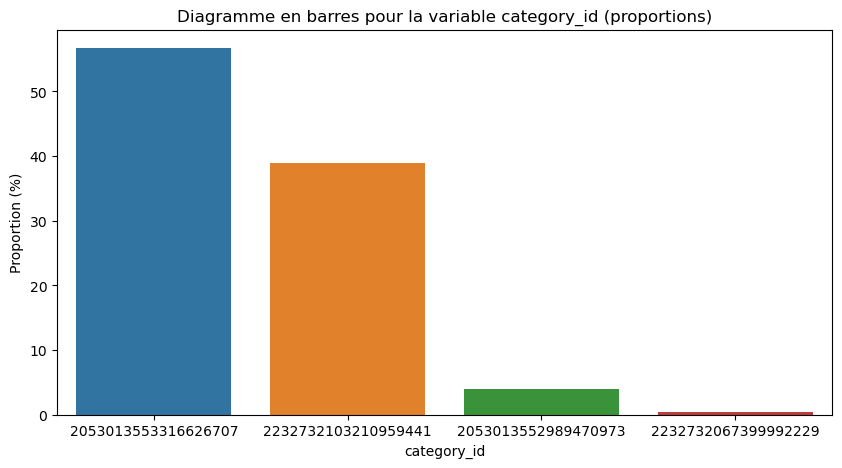

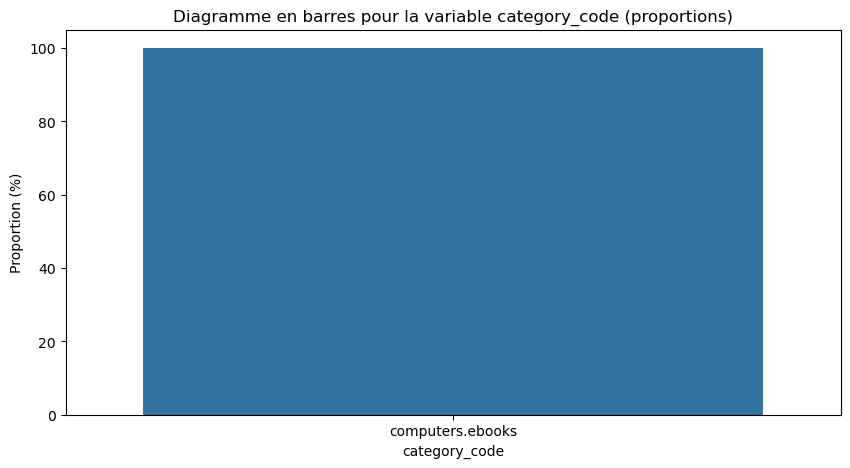

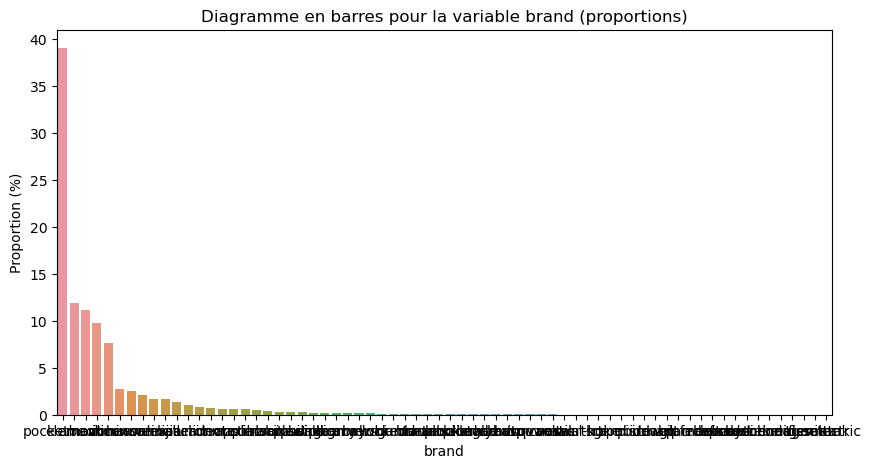

KeyboardInterrupt: 

In [ ]:
# Afficher les fréquences des variables catégorielles
# Liste des variables qualitatives
categorical_columns = ['event_time', 'event_type', 'product_id', 'category_id', 'category_code', 'brand', 'user_session']



# Créer des graphiques pour les variables catégorielles en termes de proportion
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    proportions = df[col].value_counts(normalize=True) * 100
    sns.barplot(x=proportions.index, y=proportions.values)
    plt.title(f"Diagramme en barres pour la variable {col} (proportions)")
    plt.ylabel('Proportion (%)')
    plt.show()

#### Encoding des variables catégorielles ####


Nous allons utiliser le **"One-Hot Encoding"** : est une technique de transformation de variables catégorielles en vecteurs binaires. Chaque catégorie possible de la variable est représentée par une colonne binaire, et chaque observation est représentée par un vecteur binaire de la même dimension que le nombre de catégories possibles.

In [ ]:
# Exclure les variables catégorielles non numériques
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Encodage one-hot des variables catégorielles
categorical_vars = ['event_type', 'brand']
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

In [ ]:
# Convertir les booléens en 0 et 1 pour les variables catégorielles
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assurez-vous d'inclure vos variables numériques et les colonnes d'encodage one-hot
numerical_plus_dummies = df.select_dtypes(include=[np.number])

# Sélection des k meilleures variables basées sur le test F
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(numerical_plus_dummies.drop('price', axis=1), df['price'])
selected_features = pd.DataFrame(selector.scores_, index=numerical_plus_dummies.drop('price', axis=1).columns, columns=['Score'])
print(selected_features.sort_values(by='Score', ascending=False))

                            Score
brand_amazon         98433.770424
brand_element        66649.630757
brand_novline        47096.361324
brand_apple          41435.460992
brand_pocketbook     27689.148950
...                           ...
brand_fissman            1.294835
brand_santak             0.905826
brand_kristall-auto      0.904724
brand_p.i.t.             0.818100
brand_magnetta           0.012042

[69 rows x 1 columns]


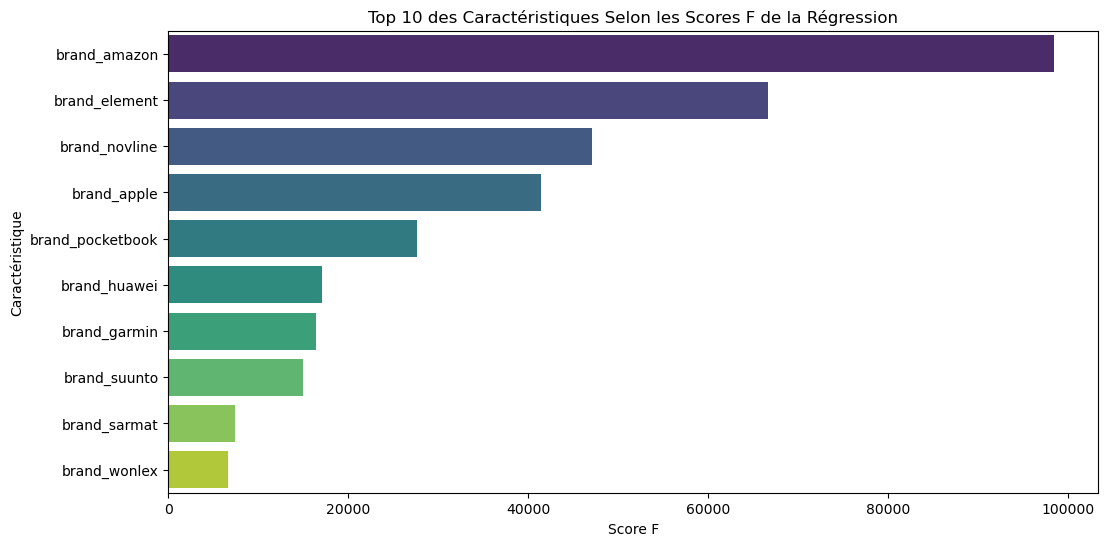

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

# Exemple DataFrame fictif si nécessaire (décommenter pour tester si df est vide)
# df = pd.DataFrame({'price': np.random.rand(100), 'var1': np.random.rand(100), 'var2': np.random.rand(100)})

# Sélectionner uniquement les colonnes numériques
numerical_plus_dummies = df.select_dtypes(include=[np.number])

# Assurez-vous que la variable 'price' est dans le DataFrame
if 'price' not in df.columns:
    raise ValueError("La variable cible 'price' est absente du DataFrame.")

# Sélection des 10 meilleures variables basées sur le test F
selector = SelectKBest(score_func=f_regression, k=15)
X_new = selector.fit_transform(numerical_plus_dummies.drop('price', axis=1), df['price'])

# Obtenir les scores pour chaque variable
scores = selector.scores_
columns = numerical_plus_dummies.drop('price', axis=1).columns

# Créer un DataFrame pour stocker les scores et les noms des variables
feature_scores = pd.DataFrame({'Feature': columns, 'Score': scores})

# Trier le DataFrame selon les scores dans l'ordre décroissant
feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False).head(10)

# Afficher le graphique à barres des scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores_sorted, palette='viridis')

# Ajouter des titres et des étiquettes
plt.title('Top 10 des Caractéristiques Selon les Scores F de la Régression')
plt.xlabel('Score F')
plt.ylabel('Caractéristique')

# Afficher le graphique
plt.show()


# Modélisation économétrique


Cel va consister à faire une modélisattion paramétrique de notre modèle

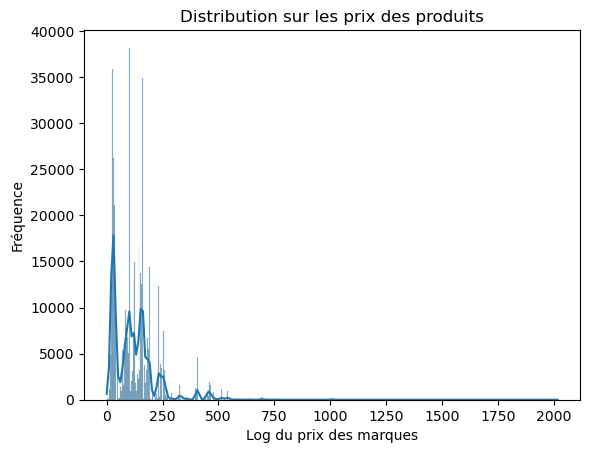

In [ ]:
# Visualisation de la variable cible
sns.histplot(df['price'], kde=True)
plt.title('Distribution sur les prix des produits')
plt.xlabel('Log du prix des marques')
plt.ylabel('Fréquence')
plt.show()

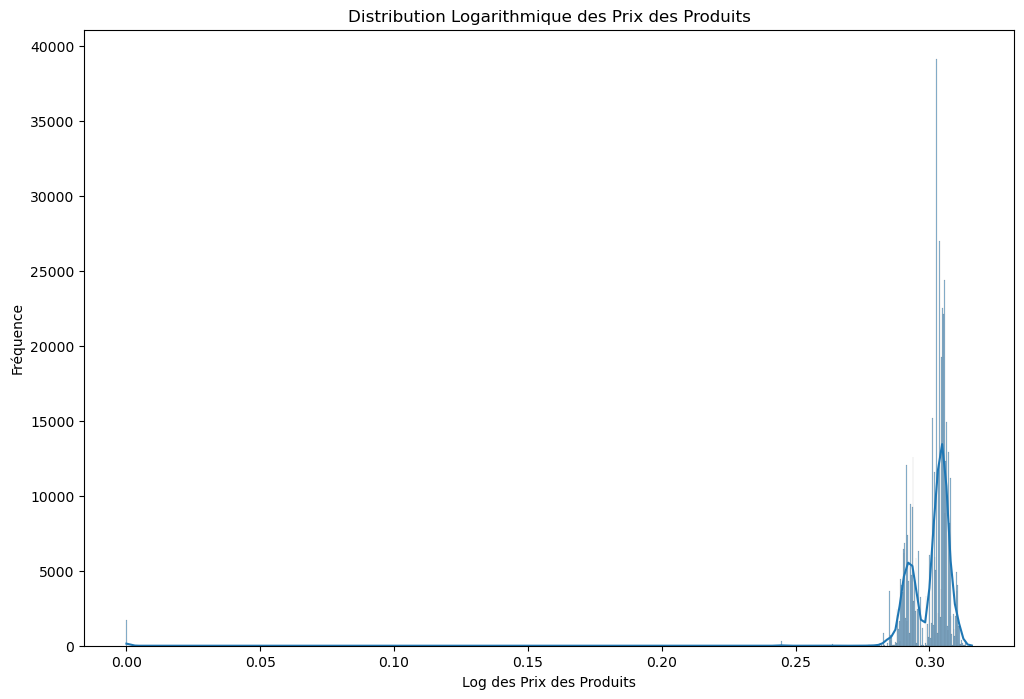

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Transformation logarithmique de la variable cible 'price'
df['log_price'] = np.log(df['price'] + 1)

# Agrandir la figure
plt.figure(figsize=(12, 8))

# Visualisation de la distribution transformée
sns.histplot(df['log_price'], kde=True)
plt.title('Distribution Logarithmique des Prix des Produits')
plt.xlabel('Log des Prix des Produits')
plt.ylabel('Fréquence')
plt.show()


<Figure size 600x600 with 0 Axes>

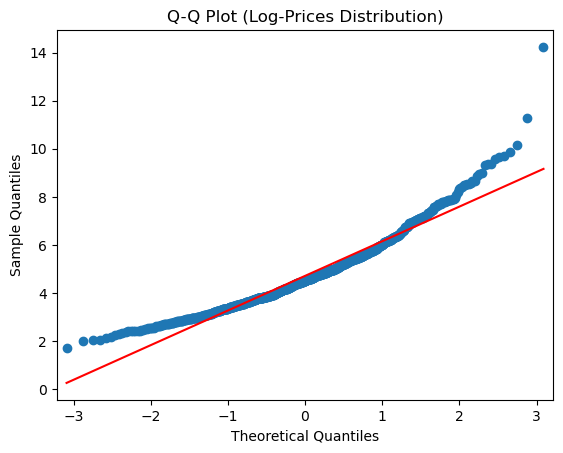

shapiro = 0.9414774775505066 
shapiro p-value = 2.0160661104722977e-19


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Chargement des données (recalcul des log-transformés si nécessaire, ici pour simuler)
# Supposons que les données de 'price' sont sous forme log-transformée
# Créons un échantillon simulé pour illustrer l'analyse

np.random.seed(42)
# Simulation d'une distribution log-normale
simulated_prices = np.random.lognormal(mean=1.5, sigma=0.3, size=1000)

# Test de Shapiro-Wilk
shapiro_test_stat, shapiro_p_value = shapiro(simulated_prices)

# Q-Q plot
plt.figure(figsize=(6, 6))
sm.qqplot(simulated_prices, line='s')
plt.title("Q-Q Plot (Log-Prices Distribution)")
plt.show()

# Résultat du test de Shapiro-Wilk
print (f'shapiro = {shapiro_test_stat} \nshapiro p-value = {shapiro_p_value}')

**Résultats des tests de normalité**

**Test de Shapiro-Wilk :**

Statistique de Shapiro-Wilk : 0.9415

p-value : 2.02e-19 (très proche de zéro)

La p-value est bien inférieure à 0,05, ce qui indique que nous rejetons l'hypothèse nulle de normalité. Cela signifie que la distribution des prix ne suit pas une loi normale stricte.

**Q-Q Plot :**

Le Q-Q plot montre une certaine déviation par rapport à la ligne rouge (ligne théorique de la normale), en particulier dans les queues de distribution.
Il y a une relative adéquation au centre, mais les valeurs extrêmes (queues) montrent un écart.

**Conclusion :**

Les données des prix logarithmiques ne suivent pas parfaitement une distribution normale, bien que l'intérieur de la distribution semble proche. Les queues de distribution montrent des écarts significatifs. La distribution pourrait être asymétrique ou influencer par des valeurs extrêmes

#### Construction et Validation du Modèle GLM

In [ ]:
# Transformation logarithmique de la variable cible pour réduire l'asymétrie
df['price'] = np.log(df['price'] + 1)

In [ ]:
# Sélection des variables explicatives, y compris les colonnes d'encodage one-hot
selected_columns = [col for col in df.columns if col not in ['price', 'log_price']]

In [ ]:
X = df[selected_columns]
y = df['log_price']

# Ajout d'une constante pour l'intercept du modèle
X = sm.add_constant(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des tailles des ensembles
print(f"Ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Ensemble de test: {X_test.shape[0]} échantillons")


Ensemble d'entraînement: 384108 échantillons
Ensemble de test: 96028 échantillons


In [ ]:
# Ajustement d'un modèle GLM avec une distribution Poisson et un lien log
model1 = sm.GLM(y_train, X_train, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
print(model1.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## MODELE 1

const                     float64
event_time                 object
product_id         string[python]
category_id        string[python]
category_code      string[python]
                        ...      
brand_volta                 int32
brand_wallberry             int32
brand_wonlex                int32
brand_worth                 int32
brand_xiaomi                int32
Length: 76, dtype: object


KeyError: 'date_column'